In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('data.csv')

In [10]:
row_sample = df.sample(frac=0.02)

In [11]:
row_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5461961,379,PAYMENT,25191.71,C4000179,0.00,0.0,M1462313277,0.00,0.00,0,0
2296895,187,CASH_OUT,67569.32,C1316394288,246575.22,179005.9,C406721769,2933.90,70503.21,0,0
4118241,302,PAYMENT,34069.00,C623423483,140847.00,106778.0,M713120784,0.00,0.00,0,0
4073679,301,CASH_OUT,516260.52,C1682605958,28891.00,0.0,C1025632946,0.00,516260.52,0,0
4802621,346,CASH_OUT,48776.54,C928759404,0.00,0.0,C743374501,87421.21,136197.76,0,0


In [12]:
def perform_eda(df: pd.DataFrame):
    print("========================================")
    print("Exploratory Data Analysis")
    print("========================================\n")

    # Print the shape of the DataFrame
    print("Shape of the DataFrame:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}\n")

    print("========================================\n")

    # Print the column names
    print("Columns in the DataFrame:")
    for col in df.columns:
        print(col)
    print("\n========================================\n")

    # Print the information about the DataFrame
    print("Information about the DataFrame:")
    df.info()
    print("\n========================================\n")

    # Print the number of null values in each column
    print("Number of null values in each column:")
    print(df.isnull().sum())
    print("\n========================================\n")

    # Print the number of unique values in each column
    print("Number of unique values in each column:")
    print(df.nunique())
    print("\n========================================\n")

    # Print the descriptive statistics for each column
    print("Descriptive statistics for each column:")
    return df.describe()
    print("\n========================================\n")


In [13]:
perform_eda(row_sample)

Exploratory Data Analysis

Shape of the DataFrame:
Number of rows: 127252
Number of columns: 11


Columns in the DataFrame:
step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 127252 entries, 5461961 to 980354
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            127252 non-null  int64  
 1   type            127252 non-null  object 
 2   amount          127252 non-null  float64
 3   nameOrig        127252 non-null  object 
 4   oldbalanceOrg   127252 non-null  float64
 5   newbalanceOrig  127252 non-null  float64
 6   nameDest        127252 non-null  object 
 7   oldbalanceDest  127252 non-null  float64
 8   newbalanceDest  127252 non-null  float64
 9   isFraud         127252 non-null  int64  
 10  isFlaggedFraud  127252 non-null  int64  
dtypes: float6

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,127252.000000,1.272520e+05,1.272520e+05,1.272520e+05,1.272520e+05,1.272520e+05,127252.000000,127252.0
mean,243.646222,1.791640e+05,8.385904e+05,8.602127e+05,1.100404e+06,1.222888e+06,0.001375,0.0
std,142.395405,6.346824e+05,2.893632e+06,2.930513e+06,3.642364e+06,3.915644e+06,0.037059,0.0
min,1.000000,1.290000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.325293e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,240.000000,7.416466e+04,1.443700e+04,0.000000e+00,1.314146e+05,2.097332e+05,0.000000,0.0
75%,335.000000,2.082394e+05,1.074652e+05,1.452618e+05,9.297300e+05,1.100299e+06,0.000000,0.0
max,742.000000,5.695142e+07,3.893942e+07,3.894623e+07,3.551855e+08,3.553805e+08,1.000000,0.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

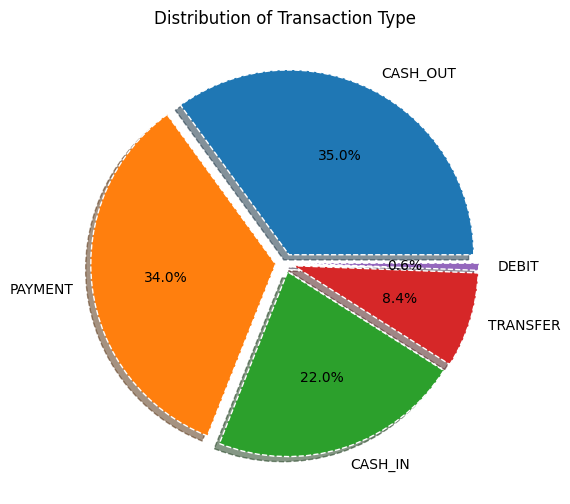

In [16]:
type = row_sample["type"].value_counts()
transactions = type.index
quantity = type.values

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(quantity, labels = transactions, autopct='%1.1f%%',shadow=True, explode=[0.05]*5, wedgeprops={"edgecolor":"white","linestyle":"dashed"})
plt.title("Distribution of Transaction Type")
plt.show()


<Axes: >

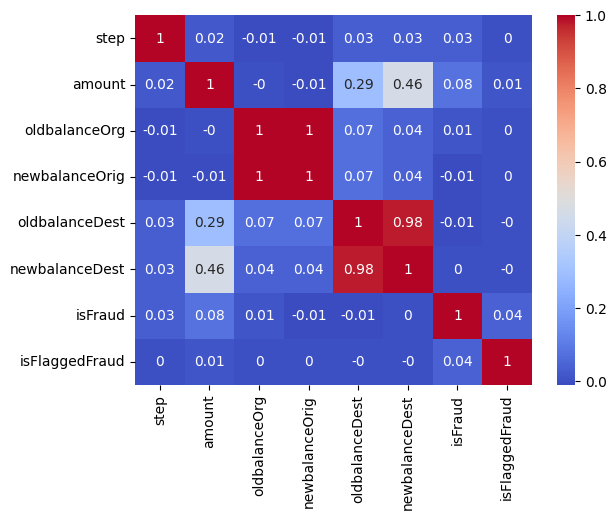

In [17]:
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation.round(2), annot=True, cmap='coolwarm')

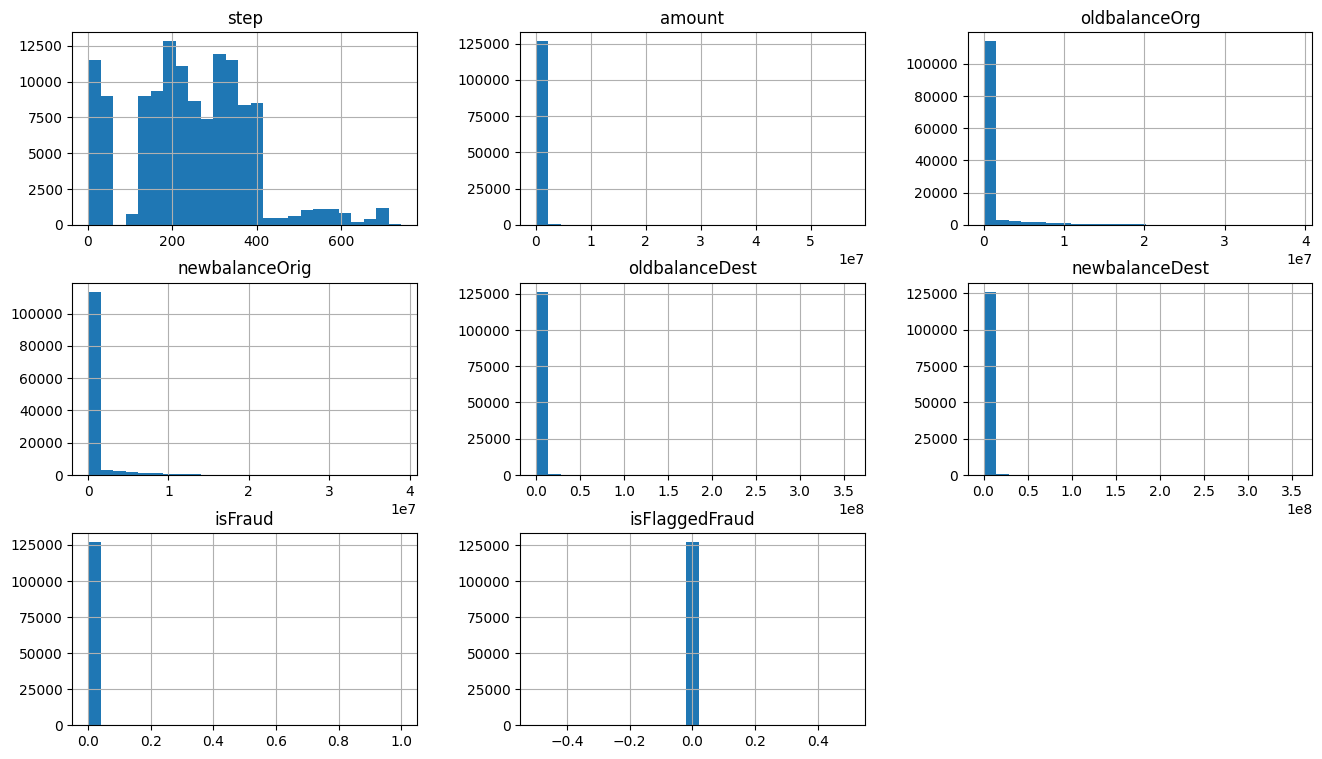

In [18]:
row_sample.hist(figsize=(16,9),bins=25)
plt.show()

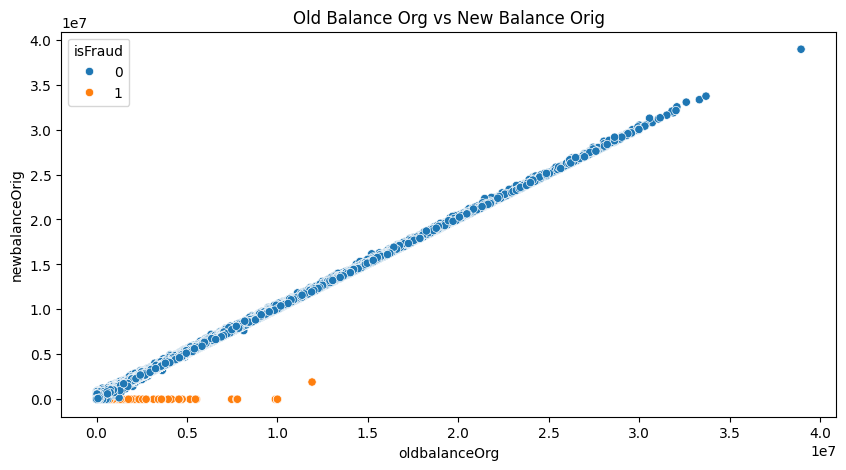

In [19]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=row_sample)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

**Here are the findings:**
* **Fraudulent Transactions:** The orange data points, representing fraudulent transactions (isFraud: 1), tend to show a higher new balance compared to the old balance. This suggests that in cases of fraud, the new balance is often inflated.
* **Non-Fraudulent Transactions:** The blue data points, representing non-fraudulent transactions (isFraud: 0), are densely packed along a diagonal line, indicating a direct and proportional relationship between the old and new balances.
* **Correlation:** There is a clear correlation for non-fraudulent transactions, where the new balance closely follows the old balance. However, for fraudulent transactions, this correlation is disrupted, showing a pattern where the new balance can be significantly higher than the old balance.

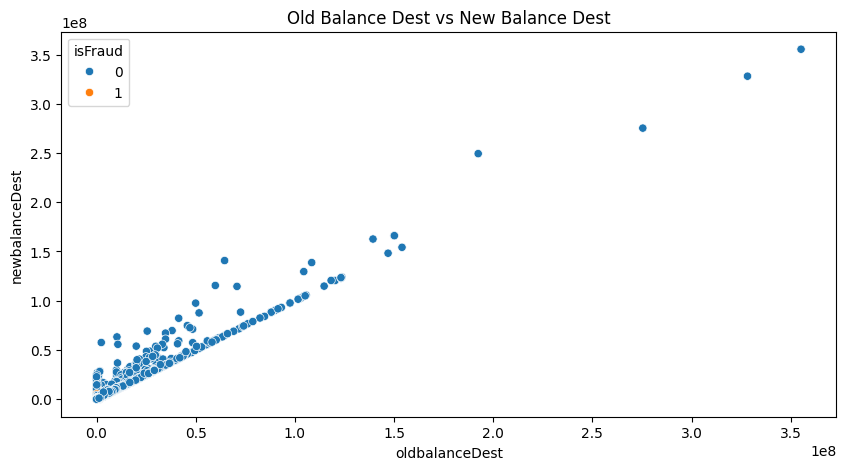

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=row_sample)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
# Define your features
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceDest']

# Define X and y
X = row_sample[features]
y = row_sample['isFraud']

In [23]:
# Convert categorical variable(s) into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [24]:
# Create a scaler object
scaler = MinMaxScaler()

In [25]:
# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# Convert the scaled features into a dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 150, class_weight='balanced', random_state=101)

In [28]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=101)

In [29]:
# Make predictions
y_pred = clf.predict(X_test)

In [30]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[25418     0]
 [   13    20]]


In [31]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25418
           1       1.00      0.61      0.75        33

    accuracy                           1.00     25451
   macro avg       1.00      0.80      0.88     25451
weighted avg       1.00      1.00      1.00     25451



In [32]:
# Print the accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9994892145691722


In [34]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)